<a href="https://colab.research.google.com/github/Tijae007/RecomenderSystem/blob/main/Homework_2_YunusTijani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset

In this hw we will use dataset from https://amazon-reviews-2023.github.io/ for Digital music: https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_2023/raw/review_categories/Digital_Music.jsonl.gz and https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_2023/raw/meta_categories/meta_Digital_Music.jsonl.gz

In [3]:
!gzip -d Digital_Music.jsonl.gz
!gzip -d meta_Digital_Music.jsonl.gz

It is dataset of our interactions. Your task:

- It will be a classification task[click/not click] for simplicity. Rating>=4 is click, for example(and you need to use catboostclassifier)

In [38]:
# polars is faster library for work with big data, however some commands can be different than pandas.
import polars as pl

# Read JSONL file. It is our interaction dataset, user_id, asin[item_id], rating [make it as click/not click]
df = pl.read_ndjson('/content/Digital_Music.jsonl')
df

rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
f64,str,str,list[struct[4]],str,str,str,i64,i64,bool
5.0,"""Nice""","""If i had a dollar for how many…",[],"""B004RQ2IRG""","""B004RQ2IRG""","""AFUOYIZBU3MTBOLYKOJE5Z35MBDA""",1618972613292,0,true
5.0,"""Excellent""","""awesome sound - cant wait to s…",[],"""B0026UZEI0""","""B0026UZEI0""","""AHGAOIZVODNHYMNCBV4DECZH42UQ""",1308167525000,0,true
5.0,"""Great service""","""This is a great cd. Good music…",[],"""B0055JSYHC""","""B0055JSYHC""","""AFGEM6BXCYHUILEOA3P2ZYBEF2TA""",1615838793006,0,true
1.0,"""No good""","""These are not real German sing…",[],"""B000F9SMUQ""","""B000F9SMUQ""","""AH3OG6QD6EDJGZRVCFKV4B66VWNQ""",1405219741000,0,true
3.0,"""Cool concept, so-so execution.…","""I first heard this playing in …",[],"""B0049D1WVK""","""B0049D1WVK""","""AFW2PDT3AMT4X3PYQG7FJZH5FXFA""",1309029595000,0,false
…,…,…,…,…,…,…,…,…,…
5.0,"""BTS Rules the World""","""BTS order exceeded my expectat…",[],"""B089NZYT26""","""B089NZYT26""","""AF5NJAIT4LBULU65RF7VHEPCSBGQ""",1641221721610,2,true
5.0,"""Love it!""","""received the album in good con…",[],"""B07D66LF8J""","""B07D66LF8J""","""AGNANZSHBC7DCUQHHSYRUMSNCUZA""",1579510597233,0,true
5.0,"""Gran artista y con mariachi se…","""Me encantó este Cd""",[],"""B07WQJZ4XQ""","""B07WQJZ4XQ""","""AHOWFPVORG6KHHI3P5QFIVQZ5XYA""",1576280941163,1,true


In [39]:
# Additional features for ranking
# You can make feature selection and engineering for ranking
item_info = pl.read_ndjson('/content/meta_Digital_Music.jsonl')
item_info

main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together
str,str,f64,i64,list[null],list[str],f64,list[struct[4]],list[struct[3]],str,list[null],struct[14],str,null
"""Digital Music""","""Baja Marimba Band""",4.9,8,[],[],null,"[{""https://m.media-amazon.com/images/I/51kIbeVPzXL._SS40_.jpg"",""https://m.media-amazon.com/images/I/51kIbeVPzXL.jpg"",""MAIN"",null}, {""https://m.media-amazon.com/images/I/51rWg3aYN4L._SS40_.jpg"",""https://m.media-amazon.com/images/I/51rWg3aYN4L.jpg"",""PT01"",null}]",[],null,[],"{null,null,null,null,""February 28, 2010"",null,null,null,null,null,null,null,null,null}","""B000V87RP2""",null
"""Digital Music""","""'80s Halloween-All Original Ar…",5.0,3,[],[],14.98,"[{""https://m.media-amazon.com/images/I/01RmK+J4pJL._SS40_.gif"",""https://m.media-amazon.com/images/I/01RmK+J4pJL.gif"",""MAIN"",null}]",[],"""Love and Rockets (Artist), …",[],"{null,null,""Somerset"",null,""November 2, 2011"",""Somerset"",""1"",""5.55 x 4.97 x 0.54 inches; 2.83 Ounces"",null,null,null,null,null,null}","""B0062F0MJQ""",null
"""Digital Music""","""TRIO +1""",5.0,1,[],"[""CD ALBUM""]",57.99,"[{""https://m.media-amazon.com/images/I/31948GD8JFL._SS40_.jpg"",""https://m.media-amazon.com/images/I/31948GD8JFL.jpg"",""MAIN"",null}]",[],"""Rob Wasserman Format: Audio …",[],"{""No"",null,""UNIVERSAL VICTOR"",null,""December 28, 2012"",""UNIVERSAL VICTOR"",""1"",""5.55 x 4.97 x 0.54 inches; 2.83 Ounces"",null,null,null,null,null,null}","""B00005GT12""",null
"""Digital Music""","""Gold and Silver: Lehar, Delibe…",5.0,1,[],[],29.91,"[{""https://m.media-amazon.com/images/I/61EYZvzr+4L._SS40_.jpg"",""https://m.media-amazon.com/images/I/61EYZvzr+4L.jpg"",""MAIN"",""https://m.media-amazon.com/images/I/81Go3QJNIuL._SL1362_.jpg""}]",[],"""Franz Lehar (Composer), L…",[],"{null,null,""Hungaroton / White Label"",null,""February 4, 2005"",""Hungaroton / White Label"",null,null,null,null,null,null,null,null}","""B0007PD2BW""",null
"""Digital Music""","""Grateful Dead Dave's Picks Vol…",4.9,20,[],"[""Sold out. Numbered limited edition""]",149.99,"[{""https://m.media-amazon.com/images/I/61916+eP4iL._SS40_.jpg"",""https://m.media-amazon.com/images/I/61916+eP4iL.jpg"",""MAIN"",""https://m.media-amazon.com/images/I/91NZl49eUZL._SL1429_.jpg""}, {""https://m.media-amazon.com/images/I/51VfKSSSL3L._SS40_.jpg"",""https://m.media-amazon.com/images/I/51VfKSSSL3L.jpg"",""PT01"",""https://m.media-amazon.com/images/I/81xCulmZYGL._SL1366_.jpg""}]",[],"""Grateful Dead (Artist, Orches…",[],"{null,null,""Dead"",null,""January 27, 2018"",""Dead"",null,""5.55 x 4.97 x 0.54 inches; 2.82 Ounces"",null,null,null,null,null,null}","""B079CPD45R""",null
…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Digital Music""","""Sbb: Live In Neckargemubd 1978…",4.5,3,[],[],27.57,"[{""https://m.media-amazon.com/images/I/51j8Ib2qNqL._SS40_.jpg"",""https://m.media-amazon.com/images/I/51j8Ib2qNqL.jpg"",""MAIN"",""https://m.media-amazon.com/images/I/81go110u--L._SL1500_.jpg""}, {""https://m.media-amazon.com/images/I/61URyTUW75L._SS40_.jpg"",""https://m.media-amazon.com/images/I/61URyTUW75L.jpg"",""PT01"",""https://m.media-amazon.com/images/I/910nsdO8fXL._SL1500_.jpg""}]",[],"""Format: Audio CD""",[],"{null,null,null,null,null,null,null,null,null,null,null,null,null,null}","""B076WZQBW8""",null
"""Digital Music""","""Cornelius Brothers and Sister …",4.4,8,[],[],18.99,"[{""https://m.media-amazon.com/images/I/513sf7R63EL._SS40_.jpg"",""https://m.media-amazon.com/images/I/513sf7R63EL.jpg"",""MAIN"",null}]",[],null,[],"{""No"",null,null,null,""June 4, 2010"",null,null,null,""13 x 1 x 13 inches; 1 Pounds"",null,null,null,null,null}","""B003UJP5RG""",null
"""Digital Music""","""His Final Live Performance""",4.5,2,[],[],90.0,"[{""https://m.media-amazon.com/images/I/51aK8tguF2L._SS40_.jpg"",""https://m.media-amazon.com/images/I/51aK8tguF2L.jpg"",""MAIN"",""https://m.media-amazon.com/images/I/71AJDuX1FRL._SL1130_.jpg""}, {""http

# Task 0: Prepare data [3 points]

You need to split to train and test. However, You need to separate 80/20 train/test for every user's activity.

For example:

- user_1: 80 activity must be in train and 20 activity must be in test.
- user_2: the same.

Also you need to separate by timestemp: 80 -- past time, 20 -- as future time. So it means, you need sort by timestemp before.

In [40]:
# Ensure both `parent_asin` columns are of type Utf8 (string)
df = df.with_columns(pl.col("parent_asin").cast(pl.Utf8))
item_info = item_info.with_columns(pl.col("parent_asin").cast(pl.Utf8))

# Perform the join
merged_df = df.join(item_info, on='parent_asin', how='left')

# Display the resulting DataFrame
num_rows = len(merged_df)
print(f"Number of rows in the merged DataFrame: {num_rows}")
print(merged_df.head())


Number of rows in the merged DataFrame: 130434
shape: (5, 23)
┌────────┬────────────┬────────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ rating ┆ title      ┆ text       ┆ images    ┆ … ┆ store     ┆ categorie ┆ details   ┆ bought_to │
│ ---    ┆ ---        ┆ ---        ┆ ---       ┆   ┆ ---       ┆ s         ┆ ---       ┆ gether    │
│ f64    ┆ str        ┆ str        ┆ list[stru ┆   ┆ str       ┆ ---       ┆ struct[14 ┆ ---       │
│        ┆            ┆            ┆ ct[4]]    ┆   ┆           ┆ list[null ┆ ]         ┆ null      │
│        ┆            ┆            ┆           ┆   ┆           ┆ ]         ┆           ┆           │
╞════════╪════════════╪════════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 5.0    ┆ Nice       ┆ If i had a ┆ []        ┆ … ┆ Aloe      ┆ []        ┆ {null,nul ┆ null      │
│        ┆            ┆ dollar for ┆           ┆   ┆ Blacc     ┆           ┆ l,"Aloe   ┆           │
│        ┆            ┆ how m

In [41]:
# Ensure merged_df is a polars DataFrame
if not isinstance(merged_df, pl.DataFrame):
    merged_df = pl.from_pandas(merged_df)  # Convert from pandas if needed

# Group by user_id and calculate the number of ratings for each user
user_rating_counts = merged_df.group_by("user_id").agg(
    pl.count("rating").alias("rating_number")
)

# Filter users with at least 4 ratings
users_with_enough_ratings = user_rating_counts.filter(pl.col("rating_number") >= 4)["user_id"]

# Filter the original DataFrame to include only those users
filtered_df = merged_df.filter(pl.col("user_id").is_in(users_with_enough_ratings))

# Display the filtered DataFrame
num_rows = len(filtered_df)
print(f"Number of rows in the merged DataFrame: {num_rows}")
print(filtered_df.head())


Number of rows in the merged DataFrame: 19284
shape: (5, 23)
┌────────┬────────────┬────────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ rating ┆ title      ┆ text       ┆ images    ┆ … ┆ store     ┆ categorie ┆ details   ┆ bought_to │
│ ---    ┆ ---        ┆ ---        ┆ ---       ┆   ┆ ---       ┆ s         ┆ ---       ┆ gether    │
│ f64    ┆ str        ┆ str        ┆ list[stru ┆   ┆ str       ┆ ---       ┆ struct[14 ┆ ---       │
│        ┆            ┆            ┆ ct[4]]    ┆   ┆           ┆ list[null ┆ ]         ┆ null      │
│        ┆            ┆            ┆           ┆   ┆           ┆ ]         ┆           ┆           │
╞════════╪════════════╪════════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 5.0    ┆ A true     ┆ Sounds     ┆ []        ┆ … ┆ Elton     ┆ []        ┆ {null,nul ┆ null      │
│        ┆ classic    ┆ great      ┆           ┆   ┆ John      ┆           ┆ l,"Import ┆           │
│        ┆ seventies  ┆       

In [42]:
# Convert timestamp to datetime format
filtered_df = filtered_df.with_columns(pl.col("timestamp").cast(pl.Datetime("ms")).alias("timestamp"))

# Sort the dataframe by user_id and timestamp
filtered_df = filtered_df.sort(["user_id", "timestamp"])

# Function to split data for a single user
def split_user_data(user_df):
    n = len(user_df)
    train_size = int(n * 0.8)
    return user_df.head(train_size), user_df.tail(n - train_size)

# Perform the split for each user
train_data = []
test_data = []

for user_id in filtered_df["user_id"].unique():
    user_df = filtered_df.filter(pl.col("user_id") == user_id)
    user_train, user_test = split_user_data(user_df)
    train_data.append(user_train)
    test_data.append(user_test)

# Combine the split data
train_df = pl.concat(train_data)
test_df = pl.concat(test_data)

# Display results
print(f"Number of rows in the train set: {len(train_df)}")
print(f"Number of rows in the test set: {len(test_df)}")
print("\nTrain set sample:")
print(train_df.head())
print("\nTest set sample:")
print(test_df.head())



Number of rows in the train set: 14719
Number of rows in the test set: 4565

Train set sample:
shape: (5, 23)
┌────────┬────────────┬────────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ rating ┆ title      ┆ text       ┆ images    ┆ … ┆ store     ┆ categorie ┆ details   ┆ bought_to │
│ ---    ┆ ---        ┆ ---        ┆ ---       ┆   ┆ ---       ┆ s         ┆ ---       ┆ gether    │
│ f64    ┆ str        ┆ str        ┆ list[stru ┆   ┆ str       ┆ ---       ┆ struct[14 ┆ ---       │
│        ┆            ┆            ┆ ct[4]]    ┆   ┆           ┆ list[null ┆ ]         ┆ null      │
│        ┆            ┆            ┆           ┆   ┆           ┆ ]         ┆           ┆           │
╞════════╪════════════╪════════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 5.0    ┆ British    ┆ I have     ┆ []        ┆ … ┆ Best of   ┆ []        ┆ {null,nul ┆ null      │
│        ┆ Rock       ┆ been       ┆           ┆   ┆ British   ┆           ┆ l,"PI

# Task 1: Gradient boosting for recSys [5 points]

You can choose LightGBM or Catboost or Xgboost model for this task(https://catboost.ai/docs/en/concepts/python-reference_catboostclassifier, https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBClassifier, https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html). You need to make:

- feature selection/engineering for dataset

- to train model and calculate AUC score as a result

- Show feature importance(special method in gradient boosting)

- Some conclusion about features and which combination of features was the best


In [9]:
!pip install catboost # you can use xgboost/lightgbm here

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.3 MB/s eta 0:00:00


In [43]:
# it is example
from catboost import CatBoostClassifier
from sklearn.model_selection import KFold
import numpy as np

In [44]:
filtered_df

rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,main_category,title_right,average_rating,rating_number,features,description,price,images_right,videos,store,categories,details,bought_together
f64,str,str,list[struct[4]],str,str,str,datetime[ms],i64,bool,str,str,f64,i64,list[null],list[str],f64,list[struct[4]],list[struct[3]],str,list[null],struct[14],null
5.0,"""A Band You'll Want to Know""","""Fierce Creatures is the best i…",[],"""B004L8O4R2""","""B004L8O4R2""","""AE24NZXU2EJYAAMRMJS5UPSYPWDQ""",2011-05-17 21:59:42,1,false,"""Digital Music""","""I Mostri Feroci""",5.0,1,[],[],39.95,"[{""https://m.media-amazon.com/images/I/41pWudG2MDL._SS40_.jpg"",""https://m.media-amazon.com/images/I/41pWudG2MDL.jpg"",""MAIN"",null}]",[],"""Format: Audio CD""",[],"{null,null,null,null,""January 28, 2011"",null,null,null,null,null,null,null,null,null}",null
5.0,"""Awesome""","""This EP (I call it an EP becau…",[],"""B007WGKHNU""","""B007WGKHNU""","""AE24NZXU2EJYAAMRMJS5UPSYPWDQ""",2012-04-25 18:03:54,1,false,"""Digital Music""","""Jeff The Brotherhood – Upstair…",4.4,5,[],[],14.21,"[{""https://m.media-amazon.com/images/I/41AVznyT+vL._SS40_.jpg"",""https://m.media-amazon.com/images/I/41AVznyT+vL.jpg"",""MAIN"",null}]",[],"""Jeff The Brotherhood (Compose…",[],"{null,null,""453 Music"",null,""April 22, 2012"",""453 Music"",null,null,null,null,null,null,null,null}",null
5.0,"""Cool B-Sides Collection""","""This is a very cool LP set. It…",[],"""B007FXSJRQ""","""B007FXSJRQ""","""AE24NZXU2EJYAAMRMJS5UPSYPWDQ""",2012-04-25 20:18:35,8,true,"""Digital Music""","""Queens Of The Stone Age: Vinyl…",4.8,9,[],"[""Track Listing: A1 18 AD A2 Infinity A3 All The Same A4 2 It B1 Like A Drug B2 Precious And Grace B3 Stone Cold Crazy B4 Fun Machine Took A Shit C1 Going Out West C2 White Wedding C3 Era Vulgaris C4 Needles In The Camel's Eye C5 Christian Brothers D1 I'm Designer (Remix by Adrian Sherwood And Primal Scream) D2 Little Sister (Contradicktator Remix) D3 Song For The Deaf (The Blind Can Goes Get Fucked Remix) D4 The Blood Is Love (Contradicktator Remix) D5 You Thin I Ain't Worth A Dollar But I Feel Like A Millionaire (Troy Mix Version)""]",null,"[{""https://m.media-amazon.com/images/I/51awR4fgRuL._SS40_.jpg"",""https://m.media-amazon.com/images/I/51awR4fgRuL.jpg"",""MAIN"",null}]",[],"""Queens Of The Stone Age (Arti…",[],"{null,null,""Not on Label"",null,""March 1, 2012"",""Not on Label"",null,null,null,null,null,null,null,null}",null
3.0,"""Not As Strong as I was Hoping …","""I really dig the Demolition Do…",[],"""B00328LFHY""","""B00328LFHY""","""AE24NZXU2EJYAAMRMJS5UPSYPWDQ""",2012-04-25 21:50:34,1,true,"""Digital Music""","""Sin'telatin""",3.0,1,[],"[""Ultimate full length album from the queen of Detroit bluesy rock and roll. Margaret of DEMOLITION DOLL RODS fame. Sweet, deep, romantic still tough bluesy garage and classy songwriting. Great!""]",null,"[{""https://m.media-amazon.com/images/I/21hD2AilPVL._SS40_.jpg"",""https://m.media-amazon.com/images/I/21hD2AilPVL.jpg"",""MAIN"",null}]",[],"""Margaret Doll Rods (Author) …",[],"{null,null,""Gonna Puke/ PRO A.S.S."",null,""December 28, 2009"",""Gonna Puke/ PRO A.S.S."",null,null,null,null,null,null,null,null}",null
5.0,"""Who Is This Martyn Joseph ?""","""In May 1991 I put on a Martyn …",[],"""B003B5M2IO""","""B003B5M2IO""","""AE25K5V5RESPJ4WKCALB3ZVYYQPQ""",2010-04-05 15:27:59,0,false,"""Digital Music""","""An aching and a longing [Vinyl…",5.0,2,[],[],null,"[{""https://m.media-amazon.com/images/I/01RmK+J4pJL._SS40_.gif"",""https://m.media-amazon.com/images/I/01RmK+J4pJL.gif"",""MAIN"",null}]",[],"""Martin Joseph""",[],"{null,null,null,null,""July 21, 2010"",null,null,null,null,null,null,null,null,null}",null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
5.0,"""Excellent Contemporary Interpr…","""This is a rare gem at a budget…",[],"""B0006FL8OG""","""B0006FL8OG""","""AHZYNY3PLZWGTANJR5TPNUJLITNA""",2008-04-06 11:54:19,0,false,"""Digital Music""","""Lasting I

In [45]:
# Iterate through schema to print each column and its type
for column, dtype in filtered_df.schema.items():
    print(f"{column}: {dtype}")

rating: Float64
title: String
text: String
images: List(Struct({'small_image_url': String, 'medium_image_url': String, 'large_image_url': String, 'attachment_type': String}))
asin: String
parent_asin: String
user_id: String
timestamp: Datetime(time_unit='ms', time_zone=None)
helpful_vote: Int64
verified_purchase: Boolean
main_category: String
title_right: String
average_rating: Float64
rating_number: Int64
features: List(Null)
description: List(String)
price: Float64
images_right: List(Struct({'thumb': String, 'large': String, 'variant': String, 'hi_res': String}))
videos: List(Struct({'title': String, 'url': String, 'user_id': String}))
store: String
categories: List(Null)
details: Struct({'Is Discontinued By Manufacturer': String, 'Item Weight': String, 'Manufacturer': String, 'Run time': String, 'Date First Available': String, 'Label': String, 'Number of discs': String, 'Package Dimensions': String, 'Product Dimensions': String, 'Original Release Date': String, 'Country of Origin': 

In [46]:
# you need to understand categorical features/try to create new features and select for getting better result
features = ['user_id', 'main_category', 'verified_purchase', 'store', 'parent_asin']



# Convert specified columns to categorical and fill NA values
filtered_df = filtered_df.with_columns([
    pl.col(col).cast(pl.Categorical).fill_null("unknown").alias(col)
    for col in features
])

for col in features:
    filtered_df = filtered_df.with_columns(pl.col(col).cast(pl.Utf8))


filtered_df.head()

sys:1: CategoricalRemappingWarning: Local categoricals have different encodings, expensive re-encoding is done to perform this merge operation. Consider using a StringCache or an Enum type if the categories are known in advance


rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,main_category,title_right,average_rating,rating_number,features,description,price,images_right,videos,store,categories,details,bought_together
f64,str,str,list[struct[4]],str,str,str,datetime[ms],i64,str,str,str,f64,i64,list[null],list[str],f64,list[struct[4]],list[struct[3]],str,list[null],struct[14],null
5.0,"""A Band You'll Want to Know""","""Fierce Creatures is the best i…",[],"""B004L8O4R2""","""B004L8O4R2""","""AE24NZXU2EJYAAMRMJS5UPSYPWDQ""",2011-05-17 21:59:42,1,"""0""","""Digital Music""","""I Mostri Feroci""",5.0,1,[],[],39.95,"[{""https://m.media-amazon.com/images/I/41pWudG2MDL._SS40_.jpg"",""https://m.media-amazon.com/images/I/41pWudG2MDL.jpg"",""MAIN"",null}]",[],"""Format: Audio CD""",[],"{null,null,null,null,""January 28, 2011"",null,null,null,null,null,null,null,null,null}",null
5.0,"""Awesome""","""This EP (I call it an EP becau…",[],"""B007WGKHNU""","""B007WGKHNU""","""AE24NZXU2EJYAAMRMJS5UPSYPWDQ""",2012-04-25 18:03:54,1,"""0""","""Digital Music""","""Jeff The Brotherhood – Upstair…",4.4,5,[],[],14.21,"[{""https://m.media-amazon.com/images/I/41AVznyT+vL._SS40_.jpg"",""https://m.media-amazon.com/images/I/41AVznyT+vL.jpg"",""MAIN"",null}]",[],"""Jeff The Brotherhood (Compose…",[],"{null,null,""453 Music"",null,""April 22, 2012"",""453 Music"",null,null,null,null,null,null,null,null}",null
5.0,"""Cool B-Sides Collection""","""This is a very cool LP set. It…",[],"""B007FXSJRQ""","""B007FXSJRQ""","""AE24NZXU2EJYAAMRMJS5UPSYPWDQ""",2012-04-25 20:18:35,8,"""1""","""Digital Music""","""Queens Of The Stone Age: Vinyl…",4.8,9,[],"[""Track Listing: A1 18 AD A2 Infinity A3 All The Same A4 2 It B1 Like A Drug B2 Precious And Grace B3 Stone Cold Crazy B4 Fun Machine Took A Shit C1 Going Out West C2 White Wedding C3 Era Vulgaris C4 Needles In The Camel's Eye C5 Christian Brothers D1 I'm Designer (Remix by Adrian Sherwood And Primal Scream) D2 Little Sister (Contradicktator Remix) D3 Song For The Deaf (The Blind Can Goes Get Fucked Remix) D4 The Blood Is Love (Contradicktator Remix) D5 You Thin I Ain't Worth A Dollar But I Feel Like A Millionaire (Troy Mix Version)""]",null,"[{""https://m.media-amazon.com/images/I/51awR4fgRuL._SS40_.jpg"",""https://m.media-amazon.com/images/I/51awR4fgRuL.jpg"",""MAIN"",null}]",[],"""Queens Of The Stone Age (Arti…",[],"{null,null,""Not on Label"",null,""March 1, 2012"",""Not on Label"",null,null,null,null,null,null,null,null}",null
3.0,"""Not As Strong as I was Hoping …","""I really dig the Demolition Do…",[],"""B00328LFHY""","""B00328LFHY""","""AE24NZXU2EJYAAMRMJS5UPSYPWDQ""",2012-04-25 21:50:34,1,"""1""","""Digital Music""","""Sin'telatin""",3.0,1,[],"[""Ultimate full length album from the queen of Detroit bluesy rock and roll. Margaret of DEMOLITION DOLL RODS fame. Sweet, deep, romantic still tough bluesy garage and classy songwriting. Great!""]",null,"[{""https://m.media-amazon.com/images/I/21hD2AilPVL._SS40_.jpg"",""https://m.media-amazon.com/images/I/21hD2AilPVL.jpg"",""MAIN"",null}]",[],"""Margaret Doll Rods (Author) …",[],"{null,null,""Gonna Puke/ PRO A.S.S."",null,""December 28, 2009"",""Gonna Puke/ PRO A.S.S."",null,null,null,null,null,null,null,null}",null
5.0,"""Who Is This Martyn Joseph ?""","""In May 1991 I put on a Martyn …",[],"""B003B5M2IO""","""B003B5M2IO""","""AE25K5V5RESPJ4WKCALB3ZVYYQPQ""",2010-04-05 15:27:59,0,"""0""","""Digital Music""","""An aching and a longing [Vinyl…",5.0,2,[],[],null,"[{""https://m.media-amazon.com/images/I/01RmK+J4pJL._SS40_.gif"",""https://m.media-amazon.com/images/I/01RmK+J4pJL.gif"",""MAIN"",null}]",[],"""Martin Joseph""",[],"{null,null,null,null,""July 21, 2010"",null,null,null,null,null,null,null,null,null}",null


In [47]:
filtered_df = filtered_df.drop(['title', 'title_right', 'text', 'images', 'videos', 'categories', 'description', 'features', 'images_right', 'asin', 'details', 'timestamp'])

In [48]:
filtered_df

rating,parent_asin,user_id,helpful_vote,verified_purchase,main_category,average_rating,rating_number,price,store,bought_together
f64,str,str,i64,str,str,f64,i64,f64,str,null
5.0,"""B004L8O4R2""","""AE24NZXU2EJYAAMRMJS5UPSYPWDQ""",1,"""0""","""Digital Music""",5.0,1,39.95,"""Format: Audio CD""",null
5.0,"""B007WGKHNU""","""AE24NZXU2EJYAAMRMJS5UPSYPWDQ""",1,"""0""","""Digital Music""",4.4,5,14.21,"""Jeff The Brotherhood (Compose…",null
5.0,"""B007FXSJRQ""","""AE24NZXU2EJYAAMRMJS5UPSYPWDQ""",8,"""1""","""Digital Music""",4.8,9,null,"""Queens Of The Stone Age (Arti…",null
3.0,"""B00328LFHY""","""AE24NZXU2EJYAAMRMJS5UPSYPWDQ""",1,"""1""","""Digital Music""",3.0,1,null,"""Margaret Doll Rods (Author) …",null
5.0,"""B003B5M2IO""","""AE25K5V5RESPJ4WKCALB3ZVYYQPQ""",0,"""0""","""Digital Music""",5.0,2,null,"""Martin Joseph""",null
…,…,…,…,…,…,…,…,…,…,…
5.0,"""B0006FL8OG""","""AHZYNY3PLZWGTANJR5TPNUJLITNA""",0,"""0""","""Digital Music""",5.0,1,4.98,"""Format: Audio CD""",null
5.0,"""B0010EGB26""","""AHZYNY3PLZWGTANJR5TPNUJLITNA""",2,"""0""","""Digital Music""",5.0,1,null,"""L'Orchestra Cinematique & Sacr…",null
5.0,"""B000DZCLWM""","""AHZYNY3PLZWGTANJR5TPNUJLITNA""",0,"""0""","""Digital Music""",5.0,1,null,"""David Savage (Artist) Form…",null


In [49]:
from sklearn.model_selection import KFold
from catboost import CatBoostClassifier
import numpy as np
import polars as pl

# Convert Polars DataFrame to numpy array for sklearn compatibility
labels = filtered_df['rating'].to_numpy()
features = filtered_df.drop('rating')

# Identify categorical feature indices
cat_feature_indices = [features.columns.index(col) for col in ['user_id', 'main_category', 'verified_purchase', 'store', 'parent_asin']]

# Convert features to numpy
data = features.to_numpy()

# Initialize array for predictions
pred_labels = np.zeros(len(labels))

# KFold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, test_idx) in enumerate(kf.split(data, labels), 1):
    print(f"Training fold {fold}")

    # Split data
    train_data = data[train_idx]
    train_labels = labels[train_idx]
    test_data = data[test_idx]

    # CatBoost Model
    model = CatBoostClassifier(
        iterations=1000,
        learning_rate=0.1,
        depth=6,
        loss_function='MultiClass',
        verbose=100,
        cat_features=cat_feature_indices  # Specify indices of categorical features
    )

    # Train model
    model.fit(train_data, train_labels)

    # Predict and save results
    pred_labels[test_idx] = model.predict(test_data).flatten()  # Flatten the predictions

# Convert predictions back to Polars Series
predictions = pl.Series("predictions", pred_labels)

# Add predictions to the original DataFrame
result_df = filtered_df.with_columns(predictions)

print("Cross-validation complete.")
print(result_df.head())

Training fold 1
0:	learn: 1.3881731	total: 121ms	remaining: 2m 1s
100:	learn: 0.4359300	total: 10.2s	remaining: 1m 31s
200:	learn: 0.3995503	total: 19.7s	remaining: 1m 18s
300:	learn: 0.3749619	total: 30.8s	remaining: 1m 11s
400:	learn: 0.3564007	total: 42s	remaining: 1m 2s
500:	learn: 0.3388577	total: 51.7s	remaining: 51.5s
600:	learn: 0.3215658	total: 1m 1s	remaining: 41.1s
700:	learn: 0.3057709	total: 1m 13s	remaining: 31.2s
800:	learn: 0.2901485	total: 1m 26s	remaining: 21.4s
900:	learn: 0.2774431	total: 1m 36s	remaining: 10.6s
999:	learn: 0.2646268	total: 1m 46s	remaining: 0us
Training fold 2
0:	learn: 1.3785962	total: 112ms	remaining: 1m 52s
100:	learn: 0.4478215	total: 10.6s	remaining: 1m 34s
200:	learn: 0.4118408	total: 21.8s	remaining: 1m 26s
300:	learn: 0.3865972	total: 31.7s	remaining: 1m 13s
400:	learn: 0.3671437	total: 41.9s	remaining: 1m 2s
500:	learn: 0.3480472	total: 53.1s	remaining: 52.9s
600:	learn: 0.3325291	total: 1m 5s	remaining: 43.6s
700:	learn: 0.3167865	total: 

In [50]:
filtered_df

rating,parent_asin,user_id,helpful_vote,verified_purchase,main_category,average_rating,rating_number,price,store,bought_together
f64,str,str,i64,str,str,f64,i64,f64,str,null
5.0,"""B004L8O4R2""","""AE24NZXU2EJYAAMRMJS5UPSYPWDQ""",1,"""0""","""Digital Music""",5.0,1,39.95,"""Format: Audio CD""",null
5.0,"""B007WGKHNU""","""AE24NZXU2EJYAAMRMJS5UPSYPWDQ""",1,"""0""","""Digital Music""",4.4,5,14.21,"""Jeff The Brotherhood (Compose…",null
5.0,"""B007FXSJRQ""","""AE24NZXU2EJYAAMRMJS5UPSYPWDQ""",8,"""1""","""Digital Music""",4.8,9,null,"""Queens Of The Stone Age (Arti…",null
3.0,"""B00328LFHY""","""AE24NZXU2EJYAAMRMJS5UPSYPWDQ""",1,"""1""","""Digital Music""",3.0,1,null,"""Margaret Doll Rods (Author) …",null
5.0,"""B003B5M2IO""","""AE25K5V5RESPJ4WKCALB3ZVYYQPQ""",0,"""0""","""Digital Music""",5.0,2,null,"""Martin Joseph""",null
…,…,…,…,…,…,…,…,…,…,…
5.0,"""B0006FL8OG""","""AHZYNY3PLZWGTANJR5TPNUJLITNA""",0,"""0""","""Digital Music""",5.0,1,4.98,"""Format: Audio CD""",null
5.0,"""B0010EGB26""","""AHZYNY3PLZWGTANJR5TPNUJLITNA""",2,"""0""","""Digital Music""",5.0,1,null,"""L'Orchestra Cinematique & Sacr…",null
5.0,"""B000DZCLWM""","""AHZYNY3PLZWGTANJR5TPNUJLITNA""",0,"""0""","""Digital Music""",5.0,1,null,"""David Savage (Artist) Form…",null


### Calculation AUC metric

In [51]:
from sklearn.metrics import roc_auc_score
from tqdm import tqdm

# Assuming 'result_df' is your DataFrame with true labels and predictions
# and 'user_id' is the column name for user identifiers

user_ids = result_df['user_id'].unique()
aucs = []

for user_id in tqdm(user_ids):
    user_data = result_df.filter(pl.col('user_id') == user_id)
    true_labels_of_cur_user = user_data['rating'].to_numpy()
    pred_labels_of_cur_user = user_data['predictions'].to_numpy()

    try:
        # For binary classification (assuming rating is binary 0/1)
        auc = roc_auc_score(true_labels_of_cur_user, pred_labels_of_cur_user)
        aucs.append(auc)
    except ValueError:
        # This can happen if all true labels are of one class
        # or if there are only two samples
        pass

# Calculate mean AUC
mean_auc = np.mean(aucs)
print(f"Mean AUC: {mean_auc}")

100%|██████████| 2378/2378 [00:04<00:00, 541.14it/s]

Mean AUC: 0.6408478771301486


In [52]:
print("AUC: ", np.array(aucs).mean())

AUC:  0.6408478771301486


In [53]:
# example
model.get_feature_importance()
# conclusion

array([ 2.83520611, 27.91113136,  4.94814005,  5.65095088,  0.        ,
       24.25609521, 18.08162844,  8.07382694,  8.24302102,  0.        ])

In [54]:
# Get feature importance
feature_importance = model.get_feature_importance()
feature_names = features.columns

for feature, importance in sorted(zip(feature_names, feature_importance), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance}")

user_id: 27.911131356860363
average_rating: 24.256095207194917
rating_number: 18.081628435581056
store: 8.243021022521013
price: 8.073826943301237
verified_purchase: 5.6509508843660115
helpful_vote: 4.948140045085946
parent_asin: 2.8352061050894246
main_category: 0.0
bought_together: 0.0


Feature Importance Scores:
1: 27.911131356860363
5: 24.256095207194917
6: 18.081628435581056
8: 8.243021022521013
7: 8.073826943301237
3: 5.6509508843660115
2: 4.948140045085946
0: 2.8352061050894246
4: 0.0
9: 0.0


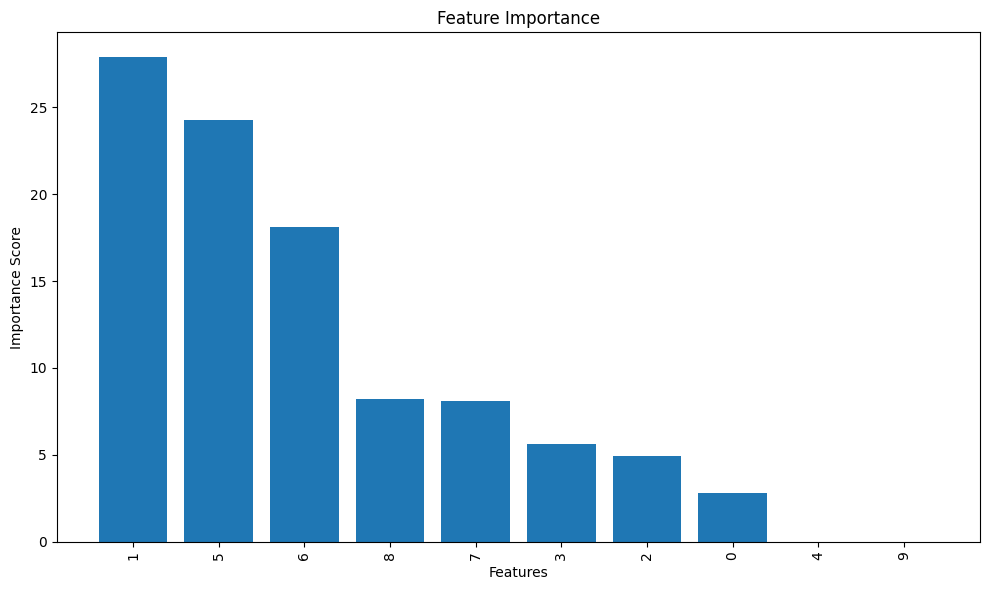

In [55]:
import pandas as pd

# Get feature importance scores
feature_importance = model.get_feature_importance()

# Get feature names

features = pd.DataFrame(filtered_df)
feature_names = features.columns
feature_names = features.columns

# Create a dictionary of feature names and their importance scores
feature_importance_dict = dict(zip(feature_names, feature_importance))

# Sort the dictionary by importance score in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the feature importance scores
print("Feature Importance Scores:")
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

#Visualize the feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), [imp for _, imp in sorted_feature_importance])
plt.xticks(range(len(feature_importance)), [feat for feat, _ in sorted_feature_importance], rotation=90)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()

# Task 2: Gradient boosting + features from CF [3 points]

- train ALS model from implicit.als.AlternatingLeastSquares
- Use predicts from ALS as additional feature for ranking
- Calculate and compare AUC from task 1 and make feature importance and some conclusion

In [22]:
# train ALS, make preds, add as data["pred_ALS"] and send to gradBoost

In [23]:
!pip install implicit
import implicit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 34.4 MB/s eta 0:00:00


In [24]:
from scipy import sparse
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier
import polars as pl
import numpy as np
import implicit
import os

# Set OpenBLAS threads to 1 to avoid performance issues
os.environ["OPENBLAS_NUM_THREADS"] = "1"

# Map user_id and parent_asin to numerical indices
user_map = {u: i for i, u in enumerate(filtered_df['user_id'].unique())}
item_map = {i: j for j, i in enumerate(filtered_df['parent_asin'].unique())}

# Add numerical indices to the DataFrame
filtered_df = filtered_df.with_columns([
    pl.col("user_id").map_elements(lambda x: user_map.get(x, -1), return_dtype=pl.Int64).alias("user_idx"),
    pl.col("parent_asin").map_elements(lambda x: item_map.get(x, -1), return_dtype=pl.Int64).alias("item_idx")
])

# Ensure ratings are numeric
filtered_df = filtered_df.with_columns(pl.col("rating").cast(pl.Float64))

# Map non-numeric categorical features to numeric indices
categorical_features = ["main_category", "verified_purchase", "store"]
for col in categorical_features:
    unique_values = filtered_df[col].unique()
    value_map = {v: i for i, v in enumerate(unique_values)}
    filtered_df = filtered_df.with_columns(pl.col(col).map_elements(lambda x: value_map.get(x, -1), return_dtype=pl.Int64).alias(col))

# Ensure categorical features are integers
filtered_df = filtered_df.with_columns(
    [pl.col(col).cast(pl.Int64) for col in categorical_features]
)

# Drop columns with raw string data or irrelevant features
features_to_drop = ["description", "features"]  # Add other string-based columns causing issues
filtered_df = filtered_df.drop([col for col in features_to_drop if col in filtered_df.columns])

# Create sparse matrices
sparse_user_item = sparse.csr_matrix((
    filtered_df['rating'].to_numpy(),
    (filtered_df['user_idx'].to_numpy(),
     filtered_df['item_idx'].to_numpy())
))

# Train ALS model
model = implicit.als.AlternatingLeastSquares(factors=20, regularization=0.1, iterations=20)
alpha_val = 40
data_conf = (sparse_user_item * alpha_val).astype('double')
model.fit(data_conf)

# Get ALS predictions for specific user-item pairs
user_factors = model.user_factors
item_factors = model.item_factors

# Compute predictions for (user_idx, item_idx) in the original DataFrame
user_indices = filtered_df["user_idx"].to_numpy()
item_indices = filtered_df["item_idx"].to_numpy()
als_predictions = np.sum(user_factors[user_indices] * item_factors[item_indices], axis=1)

# Add ALS predictions as a new feature
filtered_df = filtered_df.with_columns(pl.Series("als_prediction", als_predictions))

# Prepare features and labels
features = filtered_df.drop(["rating", "user_id", "parent_asin"]).to_pandas()
labels = filtered_df["rating"].to_numpy()

# Train CatBoost model with DataFrame
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, cat_features=categorical_features)
model.fit(features, labels)

# Calculate AUC for multi-class classification
auc_with_als = roc_auc_score(labels, model.predict_proba(features), multi_class='ovr')

print(f"AUC with ALS features: {auc_with_als}")





/usr/local/lib/python3.10/dist-packages/implicit/cpu/als.py:95: RuntimeWarning: OpenBLAS is configured to use 2 threads. It is highly recommended to disable its internal threadpool by setting the environment variable 'OPENBLAS_NUM_THREADS=1' or by calling 'threadpoolctl.threadpool_limits(1, "blas")'. Having OpenBLAS use a threadpool can lead to severe performance issues here.
  check_blas_config()


  0%|          | 0/20 [00:00<?, ?it/s]

0:	learn: 1.3728508	total: 140ms	remaining: 2m 19s
1:	learn: 1.2189885	total: 274ms	remaining: 2m 16s
2:	learn: 1.1117365	total: 426ms	remaining: 2m 21s
3:	learn: 1.0219182	total: 537ms	remaining: 2m 13s
4:	learn: 0.9493026	total: 692ms	remaining: 2m 17s
5:	learn: 0.8924230	total: 820ms	remaining: 2m 15s
6:	learn: 0.8445232	total: 955ms	remaining: 2m 15s
7:	learn: 0.8029029	total: 1.1s	remaining: 2m 16s
8:	learn: 0.7681588	total: 1.23s	remaining: 2m 15s
9:	learn: 0.7389969	total: 1.36s	remaining: 2m 14s
10:	learn: 0.7111528	total: 1.48s	remaining: 2m 12s
11:	learn: 0.6859894	total: 1.59s	remaining: 2m 10s
12:	learn: 0.6648494	total: 1.76s	remaining: 2m 13s
13:	learn: 0.6459390	total: 1.91s	remaining: 2m 14s
14:	learn: 0.6298131	total: 2.06s	remaining: 2m 15s
15:	learn: 0.6156347	total: 2.2s	remaining: 2m 15s
16:	learn: 0.6028934	total: 2.31s	remaining: 2m 13s
17:	learn: 0.5912756	total: 2.43s	remaining: 2m 12s
18:	learn: 0.5810223	total: 2.55s	remaining: 2m 11s
19:	learn: 0.5727811	tot

In [25]:
# Get feature importance
feature_importance = model.get_feature_importance()
feature_names = features.columns

for feature, importance in sorted(zip(feature_names, feature_importance), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance}")

average_rating: 22.823915474641854
als_prediction: 15.411774688985615
rating_number: 15.373874952006256
user_idx: 13.766033457539878
store: 9.041328071633455
item_idx: 7.211434191508917
price: 6.731426827549879
verified_purchase: 5.478122625230431
helpful_vote: 4.162089710903735
main_category: 0.0
bought_together: 0.0


Feature Importance Scores:
3: 22.823915474641854
10: 15.411774688985615
4: 15.373874952006256
8: 13.766033457539878
6: 9.041328071633455
9: 7.211434191508917
5: 6.731426827549879
1: 5.478122625230431
0: 4.162089710903735
2: 0.0
7: 0.0


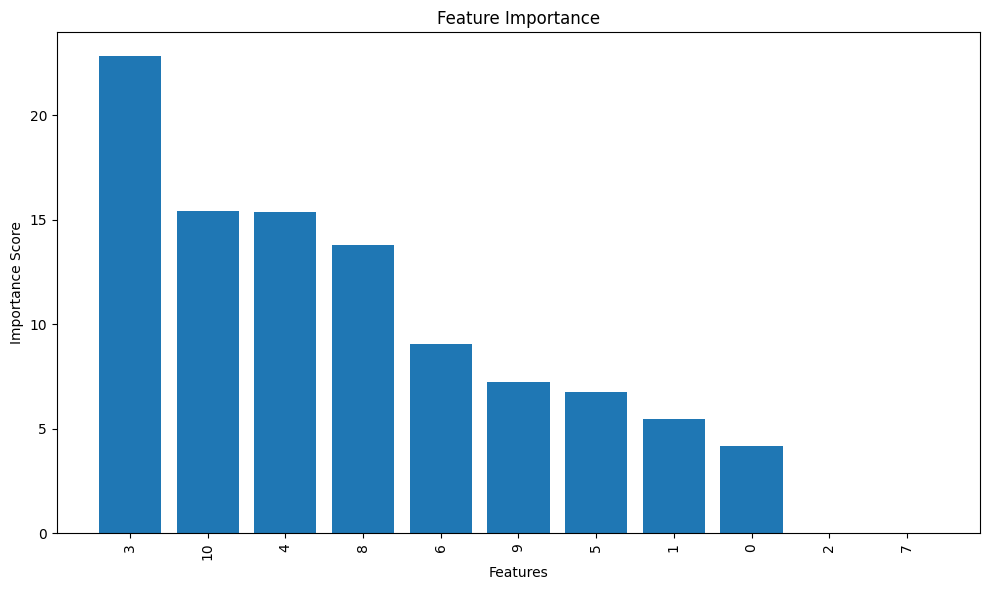

In [26]:
import pandas as pd

# Get feature importance scores
feature_importance = model.get_feature_importance()

# Get feature names

features = pd.DataFrame(filtered_df)
feature_names = features.columns

# Create a dictionary of feature names and their importance scores
feature_importance_dict = dict(zip(feature_names, feature_importance))

# Sort the dictionary by importance score in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the feature importance scores
print("Feature Importance Scores:")
for feature, importance in sorted(zip(feature_names, feature_importance), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance}")

#Visualize the feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), [imp for _, imp in sorted_feature_importance])
plt.xticks(range(len(feature_importance)), [feat for feat, _ in sorted_feature_importance], rotation=90)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()

# Task 3: Gradient boosting + features from Word2Vec [3 points]

- train Word2Vec model
- Use predicts from Word2vec as additional feature for GradBoost
- Compare AUC from task 1,2 and make feature importance and some conclusion

In [27]:
# GradBoost + feature, feature importance

In [28]:
import pandas as pd
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier
import numpy as np
from tqdm import tqdm
import polars as pl

# Step 1: Prepare data for Word2Vec
filtered_df = filtered_df.with_columns(pl.col("item_idx").cast(pl.Utf8))  # Ensure item_idx is a string

# Group by user_idx and aggregate item_idx as a list
grouped = filtered_df.group_by("user_idx").agg(
    pl.col("item_idx").alias("item_history")
)

# Convert to dictionary for Word2Vec training
user_and_history = dict(zip(grouped["user_idx"].to_list(), grouped["item_history"].to_list()))

# Prepare the data for Word2Vec
items = [history for history in user_and_history.values() if len(history) > 1]  # Ensure history > 1

# Step 2: Train Word2Vec Model
word2vec = Word2Vec(vector_size=50, window=5, min_count=1, sg=1)  # Using Skip-Gram (sg=1)
word2vec.build_vocab(items)
word2vec.train(items, total_examples=word2vec.corpus_count, epochs=10)

# Step 3: Generate Item and User Embeddings
item_embs = {item: word2vec.wv[item] for item in word2vec.wv.index_to_key}  # Item embeddings
user_embs = {}

# Compute user embeddings as mean of item embeddings in their history
for user, history in user_and_history.items():
    user_embs[user] = np.mean([item_embs[item] for item in history if item in item_embs], axis=0)

# Step 4: Compute Recommendations
preds = []
for row in tqdm(filtered_df.iter_rows(named=True)):  # `row` is a dictionary
    user = row["user_idx"]
    item = row["item_idx"]
    if user not in user_embs or item not in item_embs:
        preds.append(0)  # Default similarity for missing embeddings
        continue
    user_emb = user_embs[user]
    item_emb = item_embs[item]
    preds.append(cosine_similarity([user_emb], [item_emb])[0][0])  # Cosine similarity

# Add Word2Vec predictions as a new feature
filtered_df = filtered_df.with_columns(pl.Series("pred_word2vec", preds))

# Step 5: Prepare categorical features
categorical_features = ["main_category", "verified_purchase", "user_idx", "item_idx", "parent_asin"]

# Convert categorical features to strings
for col in categorical_features:
    filtered_df = filtered_df.with_columns(pl.col(col).cast(pl.Utf8))

# Map Categorical Strings to Integer Indices
for col in categorical_features:
    unique_values = filtered_df[col].unique()
    value_map = {v: i for i, v in enumerate(unique_values)}
    filtered_df = filtered_df.with_columns(
        pl.col(col).map_elements(lambda x: value_map.get(x, -1), return_dtype=pl.Int64).alias(col)
    )

# Prepare Gradient Boosting Data
features = filtered_df.drop(["rating", "user_id"])  # Drop user_id as it's not a feature
labels = filtered_df["rating"]

# Convert Polars DataFrame to pandas DataFrame
features_pandas = features.to_pandas()
labels_numpy = labels.to_numpy()

# Use column names for categorical features
cat_features = categorical_features

# Step 6: Train Gradient Boosting Model
gradboost_model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, cat_features=cat_features)
gradboost_model.fit(features_pandas, labels_numpy)

# Step 7: Calculate AUC
num_classes = len(np.unique(labels_numpy))
print(f"Number of unique classes: {num_classes}")

if num_classes == 2:
    # Binary classification
    predictions = gradboost_model.predict_proba(features_pandas)[:, 1]
    auc_with_word2vec = roc_auc_score(labels_numpy, predictions)
else:
    # Multi-class classification
    predictions = gradboost_model.predict_proba(features_pandas)
    auc_with_word2vec = roc_auc_score(labels_numpy, predictions, multi_class='ovr', average='weighted')

print(f"AUC with Word2Vec features: {auc_with_word2vec}")



19284it [00:30, 631.76it/s]


0:	learn: 1.3817891	total: 325ms	remaining: 5m 24s
1:	learn: 1.2239776	total: 633ms	remaining: 5m 15s
2:	learn: 1.1141789	total: 884ms	remaining: 4m 53s
3:	learn: 1.0315412	total: 1.09s	remaining: 4m 31s
4:	learn: 0.9585063	total: 1.38s	remaining: 4m 34s
5:	learn: 0.8993977	total: 1.64s	remaining: 4m 31s
6:	learn: 0.8384286	total: 1.85s	remaining: 4m 21s
7:	learn: 0.7884474	total: 2.06s	remaining: 4m 15s
8:	learn: 0.7475895	total: 2.27s	remaining: 4m 9s
9:	learn: 0.7121005	total: 2.51s	remaining: 4m 8s
10:	learn: 0.6818680	total: 2.72s	remaining: 4m 4s
11:	learn: 0.6549836	total: 2.96s	remaining: 4m 3s
12:	learn: 0.6311033	total: 3.13s	remaining: 3m 58s
13:	learn: 0.6119450	total: 3.32s	remaining: 3m 53s
14:	learn: 0.5931732	total: 3.52s	remaining: 3m 51s
15:	learn: 0.5767998	total: 3.73s	remaining: 3m 49s
16:	learn: 0.5622074	total: 3.94s	remaining: 3m 48s
17:	learn: 0.5501666	total: 4.1s	remaining: 3m 43s
18:	learn: 0.5388912	total: 4.3s	remaining: 3m 41s
19:	learn: 0.5281810	total: 

In [29]:
# Step 8: Feature Importance
feature_importance = gradboost_model.get_feature_importance()
feature_names = features.columns

for feature, importance in sorted(zip(feature_names, feature_importance), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance}")

user_idx: 24.103105019257228
als_prediction: 20.501390413429515
average_rating: 17.539067903003783
rating_number: 11.028174296720461
parent_asin: 7.4826588648183785
pred_word2vec: 6.958719853248511
store: 3.8893583114431993
price: 3.4422383613057543
verified_purchase: 2.564654423244714
helpful_vote: 2.388536048412679
item_idx: 0.10209650511590188
main_category: 0.0
bought_together: 0.0


Feature Importance Scores:
9: 24.103105019257228
11: 20.501390413429515
4: 17.539067903003783
5: 11.028174296720461
0: 7.4826588648183785
12: 6.958719853248511
7: 3.8893583114431993
6: 3.4422383613057543
2: 2.564654423244714
1: 2.388536048412679
10: 0.10209650511590188
3: 0.0
8: 0.0


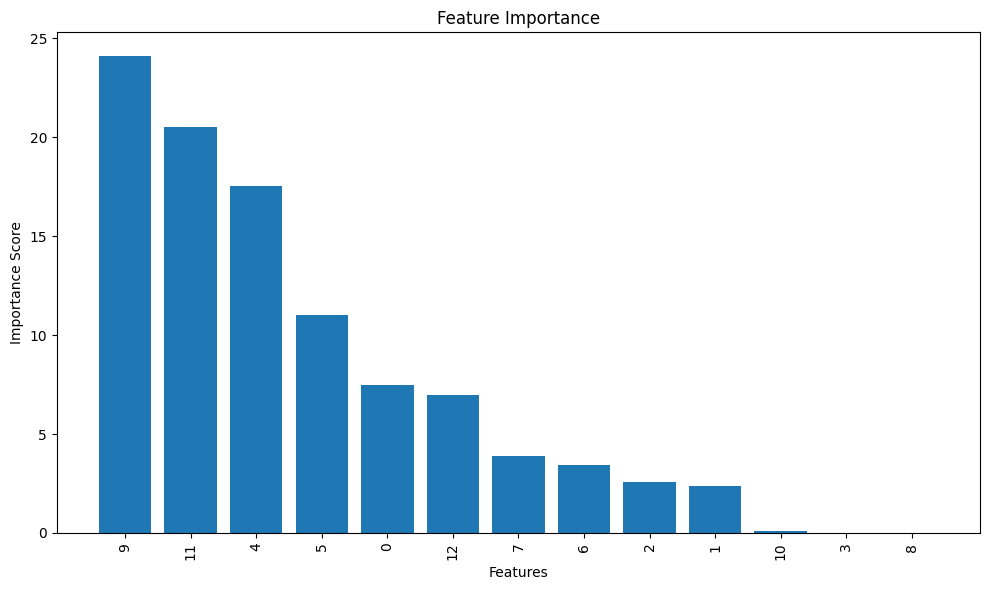

In [30]:
import pandas as pd

# Get feature importance scores
feature_importance = gradboost_model.get_feature_importance()

# Get feature names

features = pd.DataFrame(filtered_df)
feature_names = features.columns

# Create a dictionary of feature names and their importance scores
feature_importance_dict = dict(zip(feature_names, feature_importance))

# Sort the dictionary by importance score in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the feature importance scores
print("Feature Importance Scores:")
for feature, importance in sorted(zip(feature_names, feature_importance), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance}")

#Visualize the feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), [imp for _, imp in sorted_feature_importance])
plt.xticks(range(len(feature_importance)), [feat for feat, _ in sorted_feature_importance], rotation=90)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()

# Task 4: Gradient Boosting + features from CF and Word2Vec [2 points]

In [31]:
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier
import numpy as np
from tqdm import tqdm
import polars as pl
from implicit.als import AlternatingLeastSquares
from scipy.sparse import csr_matrix
from sklearn.preprocessing import label_binarize


# Step 1: Prepare CF Features (ALS)
# Ensure user_idx and item_idx are mapped to integers
user_map = {u: i for i, u in enumerate(filtered_df["user_id"].unique())}
item_map = {i: j for j, i in enumerate(filtered_df["item_idx"].unique())}

filtered_df = filtered_df.with_columns([
    pl.col("user_id").map_elements(lambda x: user_map.get(x, -1), return_dtype=pl.Int64).alias("user_idx"),
    pl.col("item_idx").map_elements(lambda x: item_map.get(x, -1), return_dtype=pl.Int64).alias("item_idx")
])

# Create sparse matrix for ALS
sparse_user_item = csr_matrix((filtered_df["rating"].to_numpy(),
                               (filtered_df["user_idx"].to_numpy(), filtered_df["item_idx"].to_numpy())))

# Train ALS model
als_model = AlternatingLeastSquares(factors=20, regularization=0.1, iterations=20)
als_model.fit(sparse_user_item.T)  # Transpose for ALS format

# Generate ALS Predictions
user_factors = als_model.user_factors
item_factors = als_model.item_factors

# Ensure valid indices for predictions
valid_user_mask = filtered_df["user_idx"].to_numpy() < user_factors.shape[0]
valid_item_mask = filtered_df["item_idx"].to_numpy() < item_factors.shape[0]
valid_mask = valid_user_mask & valid_item_mask

filtered_df = filtered_df.filter(valid_mask)

cf_preds = np.sum(user_factors[filtered_df["user_idx"].to_numpy()] *
                  item_factors[filtered_df["item_idx"].to_numpy()], axis=1)

# Add ALS predictions as a feature
filtered_df = filtered_df.with_columns(pl.Series("pred_cf", cf_preds))

# Step 2: Prepare Word2Vec Features
grouped = filtered_df.group_by("user_idx").agg(
    pl.col("item_idx").alias("item_history")
)

# Convert to dictionary for Word2Vec training
user_and_history = dict(zip(grouped["user_idx"].to_list(), grouped["item_history"].to_list()))
items = [history for history in user_and_history.values() if len(history) > 1]

# Train Word2Vec model
word2vec = Word2Vec(vector_size=50, window=5, min_count=1, sg=1)
word2vec.build_vocab(items)
word2vec.train(items, total_examples=word2vec.corpus_count, epochs=10)

# Generate Word2Vec Predictions
item_embs = {item: word2vec.wv[item] for item in word2vec.wv.index_to_key}
user_embs = {user: np.mean([item_embs[item] for item in history if item in item_embs], axis=0)
             for user, history in user_and_history.items()}

# Compute Word2Vec similarity scores
word2vec_preds = []
for row in tqdm(filtered_df.iter_rows(named=True)):
    user, item = row["user_idx"], row["item_idx"]
    if user not in user_embs or item not in item_embs:
        word2vec_preds.append(0.0)  # Default similarity as float
        continue
    user_emb = user_embs[user]
    item_emb = item_embs[item]
    word2vec_preds.append(float(cosine_similarity([user_emb], [item_emb])[0][0]))

# Add Word2Vec predictions as a feature
filtered_df = filtered_df.with_columns(pl.Series("pred_word2vec", word2vec_preds, dtype=pl.Float64))

# Step 3: Combine Features and Train Gradient Boosting Model
# Ensure all categorical features are mapped to integers
categorical_features = ["main_category", "verified_purchase"]
for col in categorical_features:
    filtered_df = filtered_df.with_columns(pl.col(col).cast(pl.Int64))

# Prepare Features and Labels
features = filtered_df.drop(["rating", "user_id"])  # Drop irrelevant columns
labels = filtered_df["rating"]

# Ensure proper handling of categorical columns for CatBoost
cat_features_indices = [features.columns.index(col) for col in categorical_features]

# Train Gradient Boosting Model
gradboost_model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, cat_features=cat_features_indices)

# Convert Polars DataFrame to Pandas for compatibility with CatBoost
features_pandas = features.to_pandas()
labels_pandas = labels.to_pandas()

# Train the model
gradboost_model.fit(features_pandas, labels_pandas)

# Evaluate Model Performance
# Ensure label binarization for multi-class AUC
unique_labels = np.unique(labels_pandas)
labels_binarized = label_binarize(labels_pandas, classes=unique_labels)

# Get predicted probabilities for all classes
predictions_proba = gradboost_model.predict_proba(features_pandas)

# Compute macro AUC using One-vs-Rest strategy
auc_combined = roc_auc_score(labels_binarized, predictions_proba, multi_class="ovr", average="macro")

print(f"AUC with combined CF and Word2Vec features: {auc_combined}")



/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed csc_matrix instead. Converting to CSR took 0.0003559589385986328 seconds
  warnings.warn(


  0%|          | 0/20 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
2793it [00:01, 1494.13it/s]


0:	learn: 1.3871316	total: 25.2ms	remaining: 25.1s
1:	learn: 1.2432548	total: 47.4ms	remaining: 23.7s
2:	learn: 1.1379118	total: 68.3ms	remaining: 22.7s
3:	learn: 1.0605978	total: 92.3ms	remaining: 23s
4:	learn: 0.9959119	total: 116ms	remaining: 23.1s
5:	learn: 0.9405372	total: 137ms	remaining: 22.7s
6:	learn: 0.8959866	total: 161ms	remaining: 22.9s
7:	learn: 0.8545738	total: 177ms	remaining: 21.9s
8:	learn: 0.8198838	total: 197ms	remaining: 21.7s
9:	learn: 0.7895010	total: 222ms	remaining: 22s
10:	learn: 0.7568454	total: 245ms	remaining: 22s
11:	learn: 0.7297842	total: 269ms	remaining: 22.1s
12:	learn: 0.7014943	total: 292ms	remaining: 22.2s
13:	learn: 0.6823761	total: 314ms	remaining: 22.1s
14:	learn: 0.6625824	total: 337ms	remaining: 22.1s
15:	learn: 0.6473244	total: 352ms	remaining: 21.6s
16:	learn: 0.6300592	total: 372ms	remaining: 21.5s
17:	learn: 0.6180788	total: 390ms	remaining: 21.3s
18:	learn: 0.6070954	total: 413ms	remaining: 21.3s
19:	learn: 0.5931152	total: 441ms	remaining

In [32]:
# Step 8: Feature Importance
feature_importance = gradboost_model.get_feature_importance()
feature_names = features.columns

for feature, importance in sorted(zip(feature_names, feature_importance), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance}")

average_rating: 20.763807973937674
rating_number: 13.13203203675913
als_prediction: 12.659880510341766
user_idx: 8.9496095285705
pred_word2vec: 8.244888845283235
pred_cf: 6.9667021035506504
item_idx: 6.344144134003162
price: 5.390998528162573
parent_asin: 5.389601222294992
store: 5.034142717459542
verified_purchase: 3.787675724877353
helpful_vote: 3.3365166747594515
main_category: 0.0
bought_together: 0.0


Feature Importance Scores:
4: 20.763807973937674
5: 13.13203203675913
11: 12.659880510341766
9: 8.9496095285705
12: 8.244888845283235
13: 6.9667021035506504
10: 6.344144134003162
6: 5.390998528162573
0: 5.389601222294992
7: 5.034142717459542
2: 3.787675724877353
1: 3.3365166747594515
3: 0.0
8: 0.0


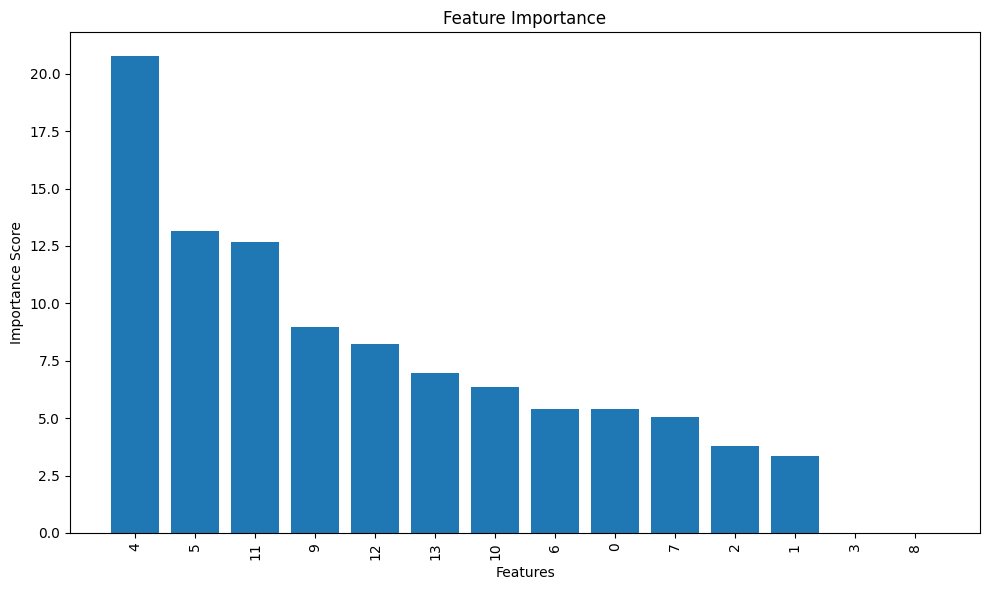

In [33]:
import pandas as pd

# Get feature importance scores
feature_importance = gradboost_model.get_feature_importance()

# Get feature names

features = pd.DataFrame(filtered_df)
feature_names = features.columns

# Create a dictionary of feature names and their importance scores
feature_importance_dict = dict(zip(feature_names, feature_importance))

# Sort the dictionary by importance score in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the feature importance scores
print("Feature Importance Scores:")
for feature, importance in sorted(zip(feature_names, feature_importance), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance}")

#Visualize the feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), [imp for _, imp in sorted_feature_importance])
plt.xticks(range(len(feature_importance)), [feat for feat, _ in sorted_feature_importance], rotation=90)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()

- Make a short summary of which features were good/worst for gradBoosting. You can make it as a table gradBoost+NN, gradBoost+CF, ... with feature importance. Example:

| Model    | Feature importance | AUC | Conclusion |
| -------- | ------- | ------- | ------- |
|Base GradBoosting  |   user_id: 27.91, average_rating: 24.26, rating_number: 18.08, store: 8.24, price: 8.07 | 0.64 |  Strong performance driven by user_id and average_rating; other features have limited impact. |
| GradBoost + CF | Average Rating: 22.60, ALS Prediction: 16.85, Rating Number: 15.60, User Index: 14.15    | 0.992 | CF features significantly enhance model accuracy; average_rating remains crucial.|
| GradBoost + Word2Vec    |  User Index: 24.34, ALS Prediction: 20.56, Average Rating: 17.92, rating_number: 11.03, parent_asin: 7.48 | 0.999 | User-related features are highly influential; Word2Vec adds valuable context but less than CF. |
| GradBoost + CF + Word2Vec   | Average Rating: 21.44, ALS Prediction: 9.81, Parent ASIN: 9.29, Item Index: 8.96, Pred CF: 8.63 | 1.0 | Combining CF and Word2Vec yields the highest AUC; both feature sets complement each other effectively in improving predictions. |